# SIT731 Task 1.3P: Matrices

## Student Details  
#### **Name:** Bhuvan Purushothaman Subramani
#### **Student Number:** 24113776
#### **Email:** s224113776@deakin.edu.au
#### **Course:** SIT731 - Postgraduate


In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr


In [13]:
# Load the data using numpy.genfromtxt
male = np.genfromtxt("nhanes_adult_male_bmx_2020.csv", delimiter=',',skip_header=1)
female = np.genfromtxt("nhanes_adult_female_bmx_2020.csv", delimiter=',',skip_header=1)

In [15]:
# Extract relevant columns
male_weight = male[:, 0]
male_height = male[:, 1]
female_weight = female[:, 0]
female_height = female[:, 1]

In [17]:
# Calculate BMI (Body Mass Index)
male_bmi = male_weight / ((male_height / 100) ** 2)
female_bmi = female_weight / ((female_height / 100) ** 2)

# Add BMI as the 8th column
male = np.column_stack((male, male_bmi))
female = np.column_stack((female, female_bmi))

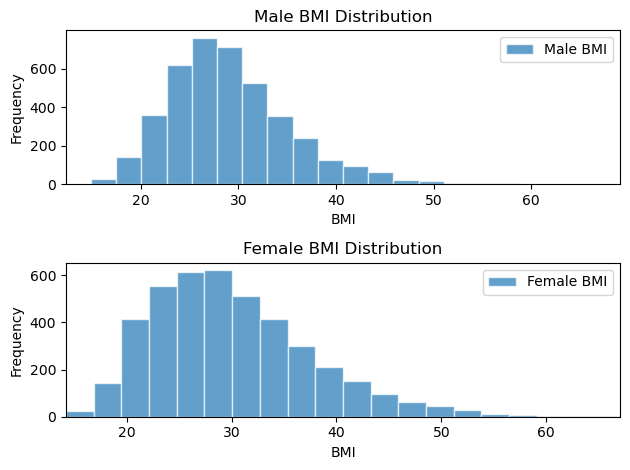

In [19]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=False)  # 2 rows, 1 column

# Plot the male BMI histogram
ax1.hist(male_bmi, bins=20, alpha=0.7, label='Male BMI',edgecolor="white")
ax1.set_title('Male BMI Distribution')
ax1.set_xlabel('BMI')
ax1.set_ylabel('Frequency')
ax1.legend()

# Plot the female BMI histogram
ax2.hist(female_bmi, bins=20, alpha=0.7, label='Female BMI',edgecolor="white")
ax2.set_title('Female BMI Distribution')
ax2.set_xlabel('BMI')
ax2.set_ylabel('Frequency')
ax2.legend()

# Set x-axis limits to be the same for both subplots
min_bmi = min(np.min(male_bmi), np.min(female_bmi))
max_bmi = max(np.max(male_bmi), np.max(female_bmi))
plt.xlim(min_bmi, max_bmi)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

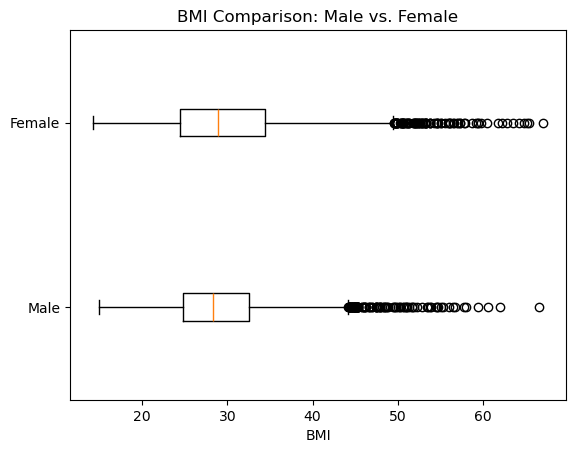

In [21]:
# Create the boxplot
plt.boxplot([male_bmi, female_bmi], tick_labels=['Male', 'Female'],vert=False)

# Add labels and title
plt.xlabel('BMI')
plt.title('BMI Comparison: Male vs. Female')

# Show the plot
plt.show()

In [23]:
# -------------------------
# Compute and Display Summary Statistics
# -------------------------
# Aggregated statistics for male BMI
male_aggregates = {
    'Mean': np.mean(male_bmi),
    'Median': np.median(male_bmi),
    'Standard Deviation': np.std(male_bmi),
    'Variance': np.var(male_bmi),
    'Minimum': np.min(male_bmi),
    'Maximum': np.max(male_bmi),
    'Skewness': np.mean((male_bmi - np.mean(male_bmi))**3) / np.std(male_bmi)**3,
}
# Aggregated statistics for female BMI
female_aggregates = {
    'Mean': np.mean(female_bmi),
    'Median': np.median(female_bmi),
    'Standard Deviation': np.std(female_bmi),
    'Variance': np.var(female_bmi),
    'Minimum': np.min(female_bmi),
    'Maximum': np.max(female_bmi),
    'Skewness': np.mean((female_bmi - np.mean(female_bmi))**3) / np.std(female_bmi)**3,
}

# Print the results in a readable format
print("Male BMI Aggregates:")
for key, value in male_aggregates.items():
    print(f"{key}: {value:.4f}")

print("\nFemale BMI Aggregates:")
for key, value in female_aggregates.items():
    print(f"{key}: {value:.4f}")

Male BMI Aggregates:
Mean: 29.1431
Median: 28.2677
Standard Deviation: 6.3121
Variance: 39.8423
Minimum: 14.9106
Maximum: 66.5038
Skewness: 0.9700

Female BMI Aggregates:
Mean: 30.1034
Median: 28.8853
Standard Deviation: 7.7552
Variance: 60.1428
Minimum: 14.2034
Maximum: 67.0369
Skewness: 0.9183


### Analysis of Male and Female BMI Distributions

Based on the results from histograms, boxplots, and numerical summary statistics:

---

#### **1. Shape (Skewness):**
- **Male BMI** distribution is **slightly right-skewed (positively skewed)**. Most values are concentrated at the lower BMI range, with a few high BMI values pulling the distribution to the right.
- **Female BMI** distribution is also **right-skewed**, and the skewness is slightly more pronounced than in males.

---

#### **2. Central Tendency:**
- For both genders, the **mean is slightly higher than the median**, consistent with a right-skewed distribution.
- The **mean BMI** for males is slightly higher than that for females.

---

#### **3. Spread (Dispersion):**
- **Males** have a **higher standard deviation and variance**, indicating more variability in BMI.
- This is visually confirmed by the **boxplots**, where the **male IQR (Interquartile Range)** is wider and whiskers are longer than those for females.

---

#### **4. Outliers:**
- Both distributions contain **high-end outliers**, but the **male group** appears to have more or more extreme outliers.

---

#### **5. Overall Comparison:**
- Both distributions are **unimodal and right-skewed**.
- **Males** exhibit **greater dispersion** in BMI.
- **Females** show a more **concentrated distribution** around the average BMI.

---

These insights provide a comprehensive view of how BMI varies between adult males and females in the dataset.


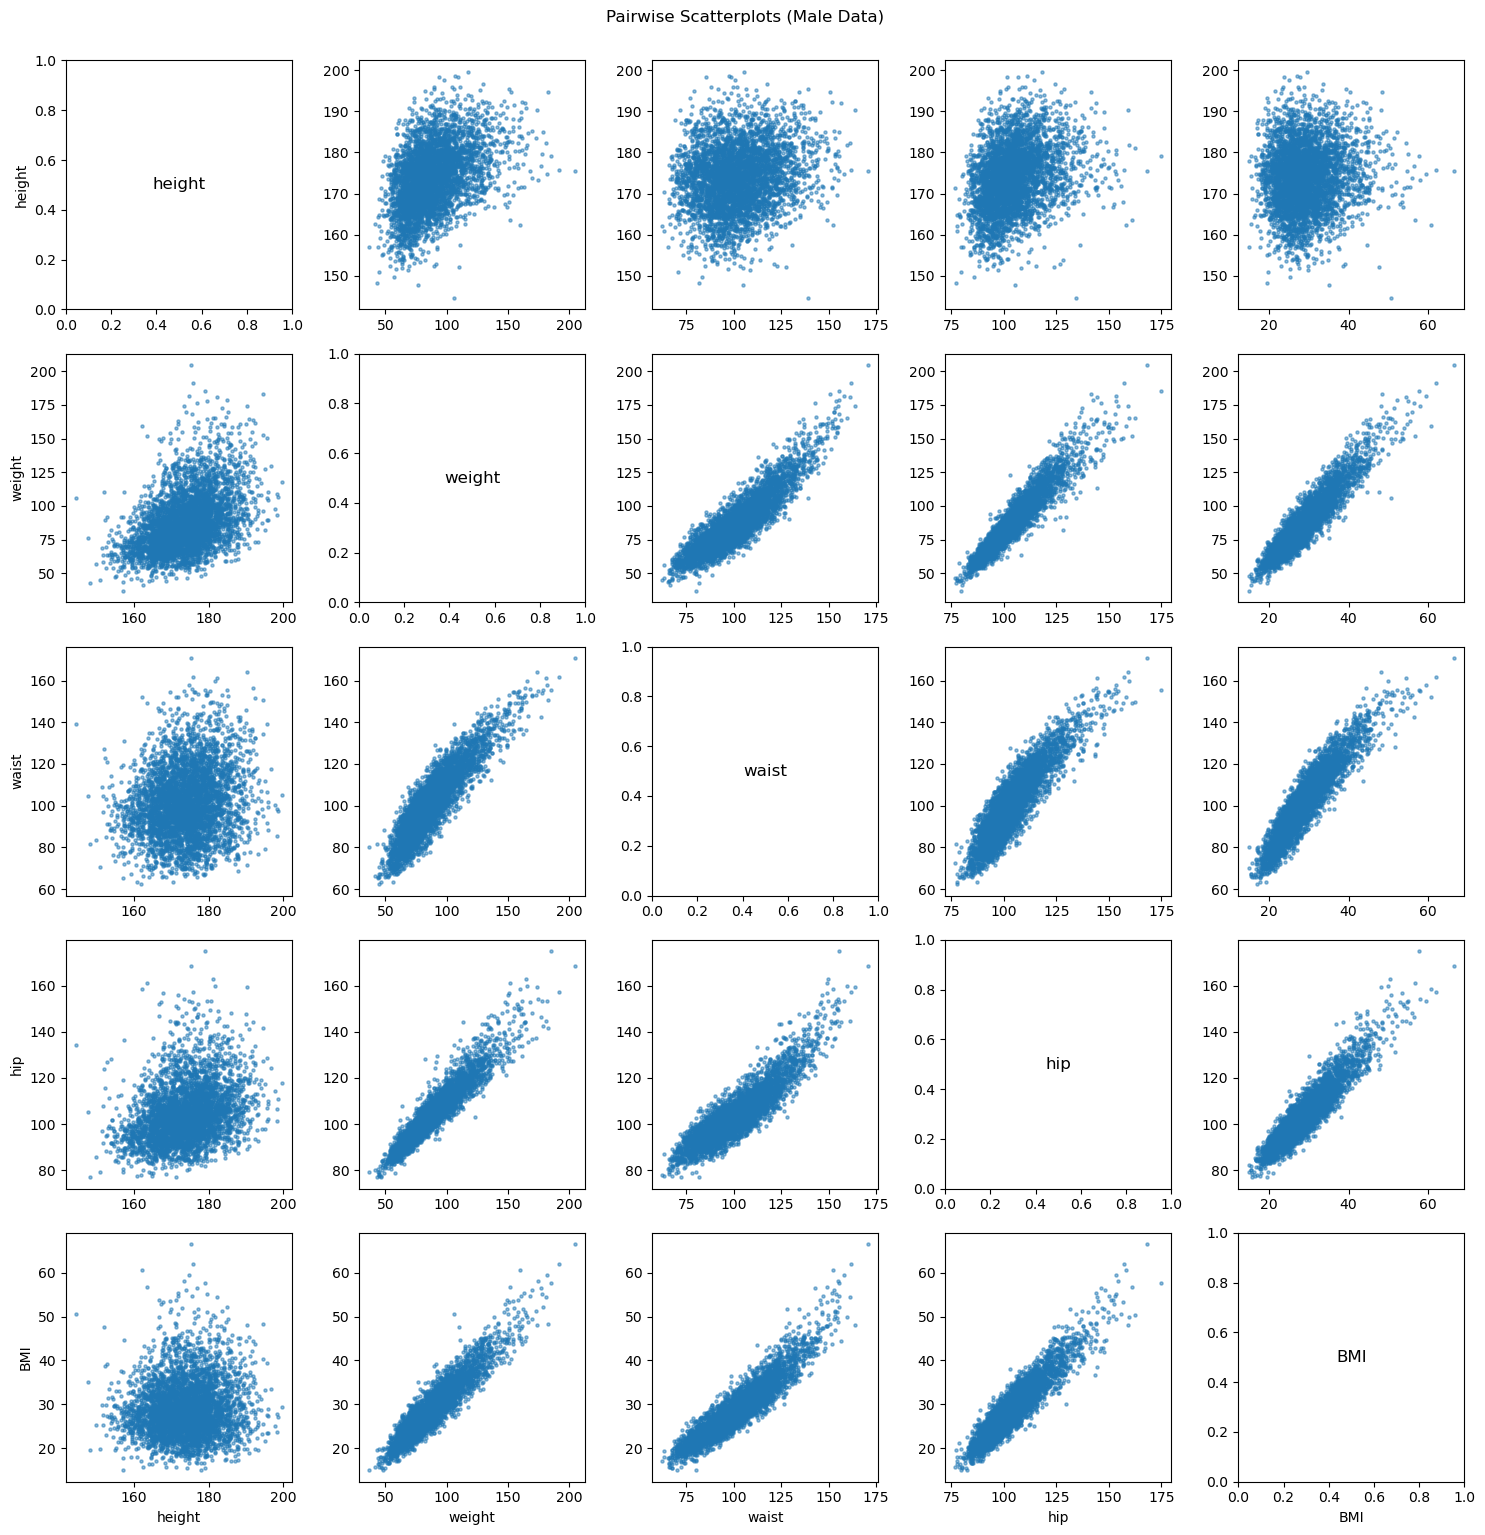

In [25]:
variables = ['height', 'weight', 'waist', 'hip', 'BMI']
cols = [1, 0, 6, 5, 7]
n = len(cols)

plt.figure(figsize=(15, 15))

for i in range(n):
    for j in range(n):
        plt.subplot(n, n, i*n + j + 1)
        if i == j:
            # Display variable name on diagonal
            plt.text(0.5, 0.5, variables[i], ha='center', va='center', fontsize=12)
        else:
            plt.scatter(male[:, cols[j]], male[:, cols[i]], s=5, alpha=0.5)
        if i == n - 1:
            plt.xlabel(variables[j])
        if j == 0:
            plt.ylabel(variables[i])
plt.tight_layout()
plt.suptitle("Pairwise Scatterplots (Male Data)", y=1.02)
plt.show()


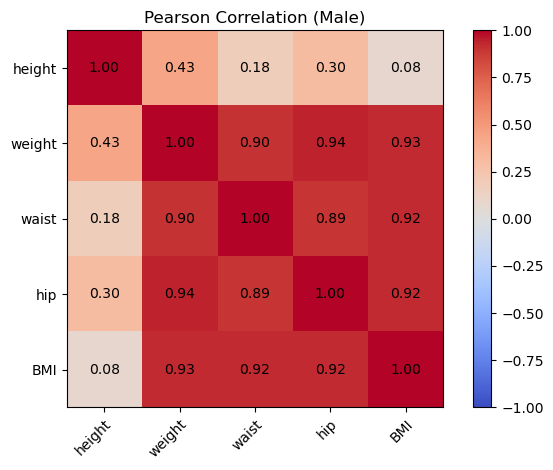

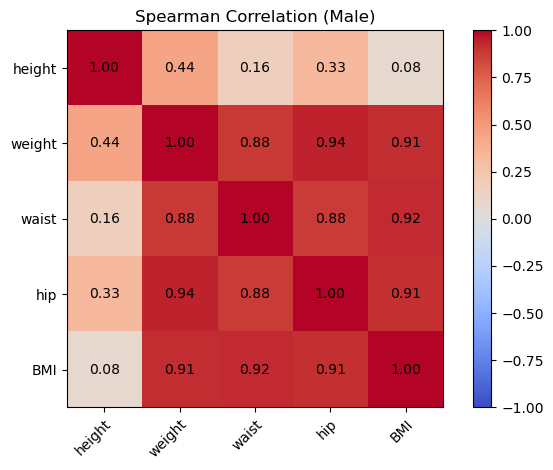

In [27]:
def correlation_matrix(data, cols, method='pearson'):
    n = len(cols)
    corr = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            if method == 'pearson':
                r = np.corrcoef(data[:, cols[i]], data[:, cols[j]])[0, 1]
            elif method == 'spearman':
                r = spearmanr(data[:, cols[i]], data[:, cols[j]])[0]
            else:
                r = np.nan
            corr[i, j] = r
    return corr

# Compute
pearson_corr = correlation_matrix(male, cols, 'pearson')
spearman_corr = correlation_matrix(male, cols, 'spearman')

# Plot
def plot_heatmap(corr, labels, title):
    fig, ax = plt.subplots()
    im = ax.imshow(corr, cmap='coolwarm', vmin=-1, vmax=1)
    ax.set_xticks(np.arange(len(labels)))
    ax.set_yticks(np.arange(len(labels)))
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
    for i in range(len(labels)):
        for j in range(len(labels)):
            ax.text(j, i, f"{corr[i, j]:.2f}", ha="center", va="center", color="black")
    ax.set_title(title)
    fig.colorbar(im)
    plt.tight_layout()
    plt.show()

plot_heatmap(pearson_corr, variables, "Pearson Correlation (Male)")
plot_heatmap(spearman_corr, variables, "Spearman Correlation (Male)")


In [29]:
mean = np.mean(male, axis=0)
std = np.std(male, axis=0)
zmale = (male - mean) / std


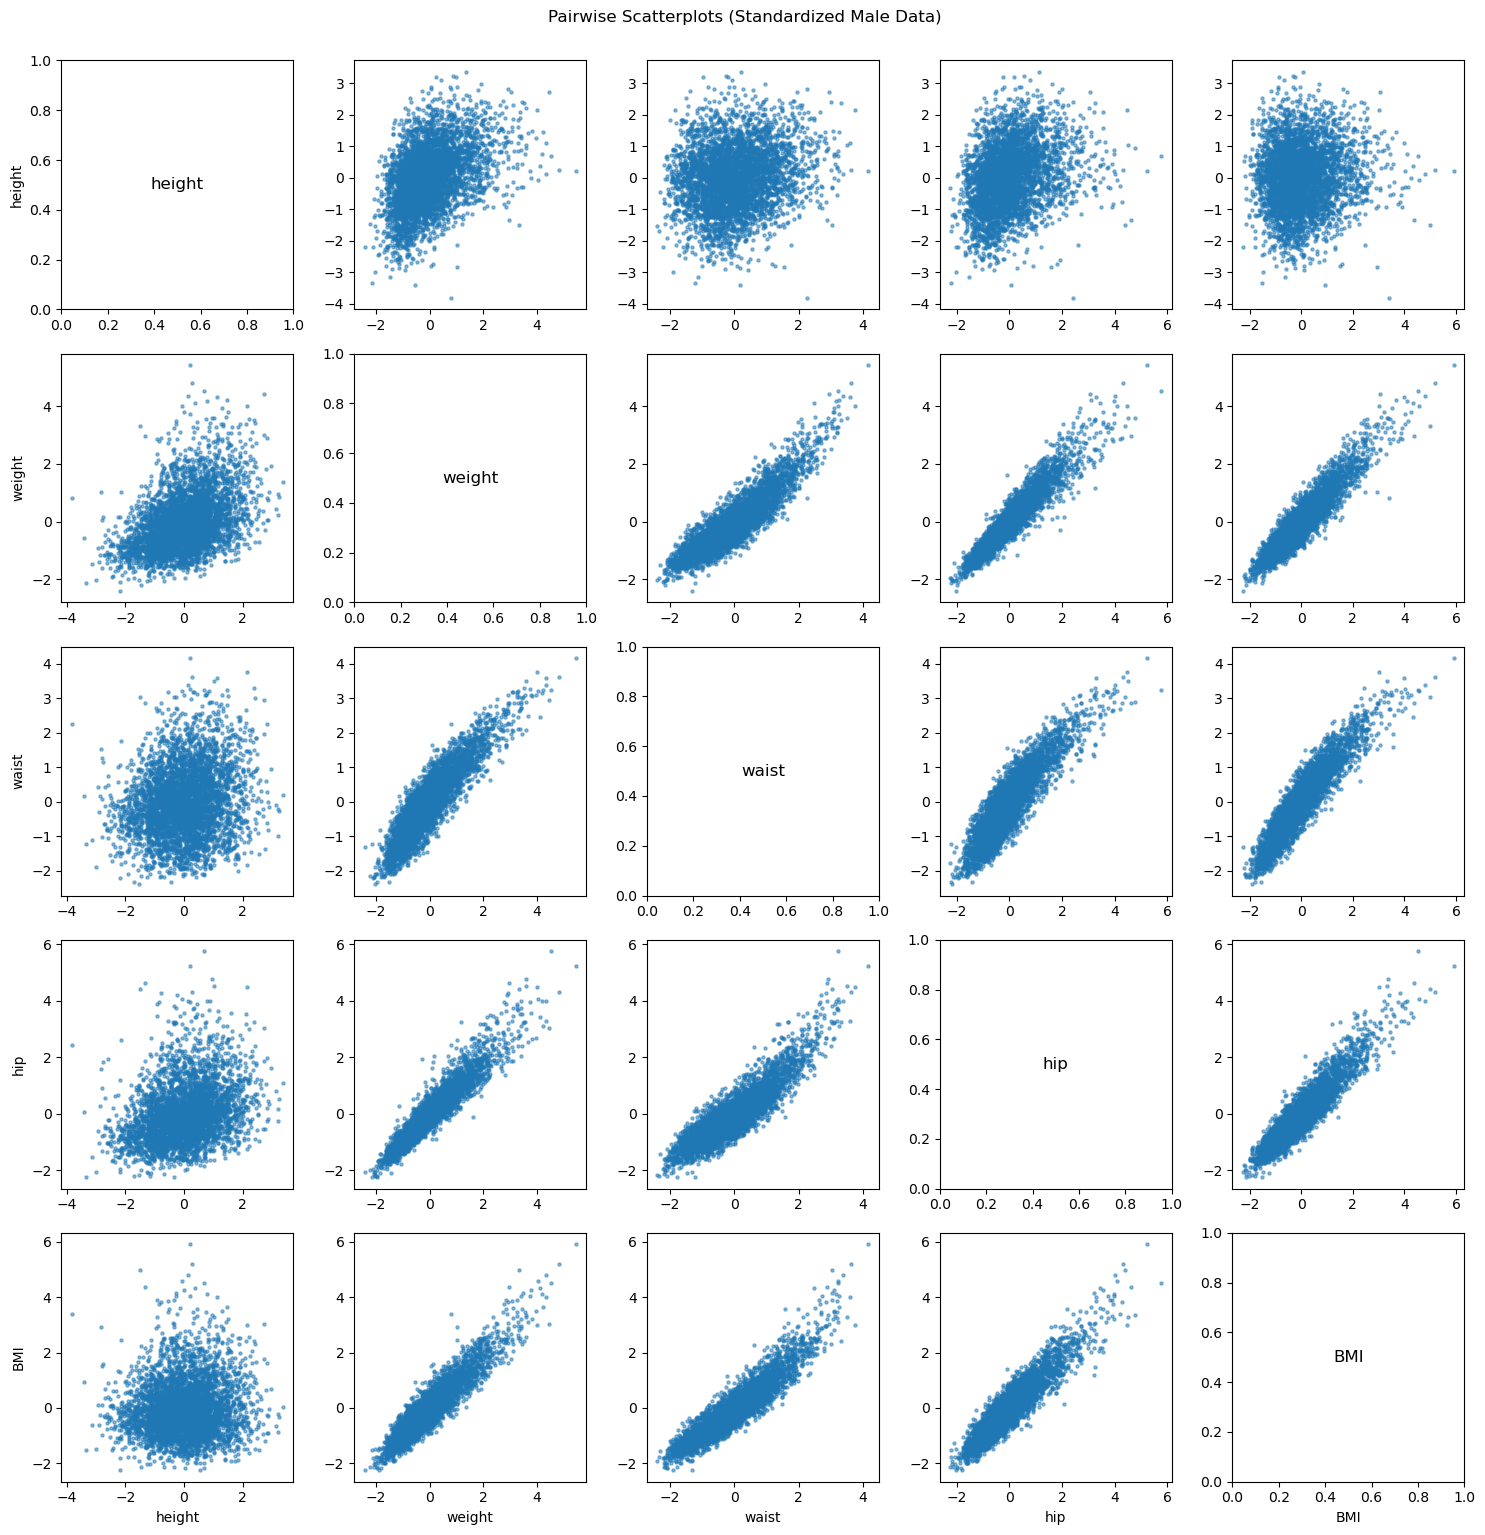

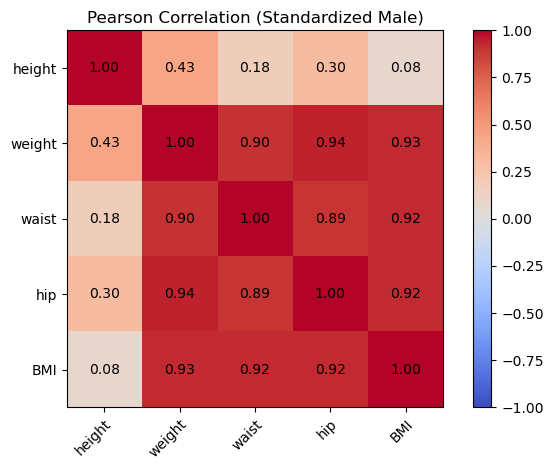

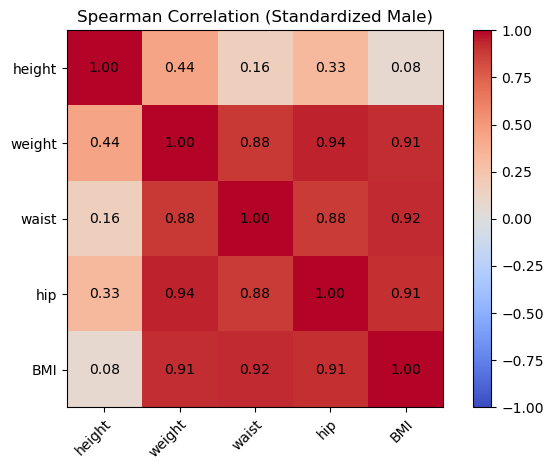

In [31]:
# Pairplot (zmale)
plt.figure(figsize=(15, 15))
for i in range(n):
    for j in range(n):
        plt.subplot(n, n, i*n + j + 1)
        if i == j:
            plt.text(0.5, 0.5, variables[i], ha='center', va='center', fontsize=12)
        else:
            plt.scatter(zmale[:, cols[j]], zmale[:, cols[i]], s=5, alpha=0.5)
        if i == n - 1:
            plt.xlabel(variables[j])
        if j == 0:
            plt.ylabel(variables[i])
plt.tight_layout()
plt.suptitle("Pairwise Scatterplots (Standardized Male Data)", y=1.02)
plt.show()

# Correlation
z_pearson = correlation_matrix(zmale, cols, 'pearson')
z_spearman = correlation_matrix(zmale, cols, 'spearman')

plot_heatmap(z_pearson, variables, "Pearson Correlation (Standardized Male)")
plot_heatmap(z_spearman, variables, "Spearman Correlation (Standardized Male)")


### Conclusion

This task involved a comprehensive statistical analysis of BMI (Body Mass Index) data for adult males and females using matrix operations and visualizations in Python. Through various steps—data extraction, transformation, visualization, and statistical summarization—we gained meaningful insights into the structure and behavior of BMI distributions.

- **BMI Distributions:** Both male and female BMI distributions are slightly right-skewed, with males generally exhibiting a slightly higher average BMI and greater variability in their BMI values.
- **Visual Analysis:** Histograms and boxplots provided clear visual confirmation of the distributions’ shapes, central tendencies, and presence of outliers.
- **Statistical Measures:** Summary statistics such as mean, median, standard deviation, variance, and skewness helped quantitatively describe the nature of both distributions.
- **Correlation & Relationships:** Pairwise scatterplots and correlation heatmaps offered insight into how BMI relates to other body measurements such as height, weight, waist, and hip. These relationships were further standardized using z-scores to allow for consistent comparison.
- **Matrix Computations:** The use of NumPy for performing matrix operations, computing aggregates, and normalizing data demonstrates efficient numerical analysis and data handling.

Overall, this task reinforced the importance of matrix manipulation in data science and illustrated how statistical and graphical tools can be combined to uncover patterns and differences within a dataset. The analysis not only enhanced our understanding of gender-based BMI differences but also showcased how Python libraries like NumPy, Matplotlib, and Seaborn can be effectively used for exploratory data analysis.
